In [432]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import operator

In [433]:
path = 'startup_funding.csv'

In [434]:
df = pd.read_csv(path)

In [435]:
test1 = df.copy()

In [436]:
#filtering na
test1.dropna(inplace = True, subset = ['CityLocation'])
test1.reset_index(drop = True, inplace = True)

In [437]:
#function to split indian cities from string
def ind_city(city):
    return city.split('/')[0].strip()

In [438]:
#replacing the wrong written city
test1['CityLocation'].replace("bangalore", "Bangalore", inplace = True)
test1['CityLocation'].replace("Delhi", "New Delhi", inplace = True)
test1['CityLocation'].replace("SFO / Bangalor", "Bangalore", inplace = True)
test1['CityLocation'].replace("Seattle / Bangalore", "Bangalore", inplace = True)

In [439]:
#filtering city
test1['CityLocation'] = test1['CityLocation'].apply(ind_city)

In [440]:
#filtering the cities on the basis of given conditions
test1 = test1[(test1['CityLocation'] == "Bangalore") | (test1['CityLocation'] == "Mumbai") | (test1['CityLocation'] == "Gurgaon") | (test1['CityLocation'] == "Noida") | (test1['CityLocation'] == "New Delhi")]

In [441]:
test1.head(20)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN
7,7,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,"20,000,000",NaN
8,8,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"8,500,000",NaN
9,9,05/07/2017,Moglix,eCommerce,B2B marketplace for Industrial products,Noida,"International Finance Corporation, Rocketship,...",Private Equity,"12,000,000",NaN
10,10,05/07/2017,Timesaverz,Consumer Internet,Hyperlocal home services provider,Mumbai,BCCL,Private Equity,"1,000,000",NaN
11,11,06/07/2017,Minjar,Technology,Cloud Solutions provider,Bangalore,"Blume Ventures, Contrarian Capital India Partn...",Seed Funding,NaN,NaN


In [442]:
#extracting the cities and their counts
temp = test1['CityLocation'].value_counts()
city = temp.index
No_Of_Funding = temp.values

In [443]:
#printing the city where most number of funding is Done
print("City where most number of funding is done among Bangalore, Mumbai and NCR is '",city[0],"'.")

City where most number of funding is done among Bangalore, Mumbai and NCR is ' Bangalore '.


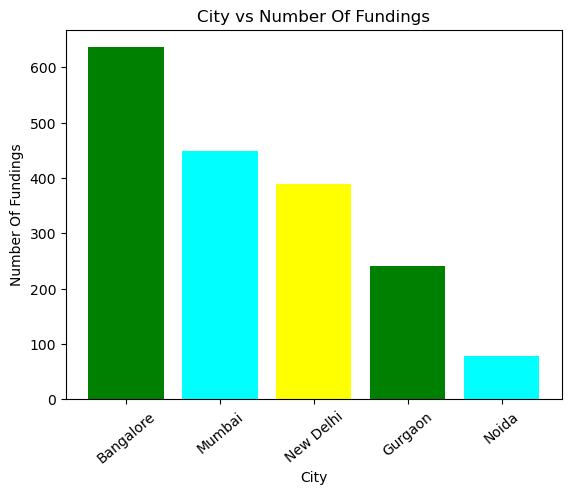

,Name Of City,Number Of Fundings
0,Bangalore,636
1,Mumbai,449
2,New Delhi,389
3,Gurgaon,241
4,Noida,79


In [444]:
#bar Graph
plt.bar(city, No_Of_Funding, color = ['green','cyan','yellow'], width = 0.8)
plt.xlabel("City")
plt.xticks(rotation = 40)
plt.ylabel("Number Of Fundings")
plt.title("City vs Number Of Fundings")
plt.show()
li = list(zip(city, No_Of_Funding))

#build pandas dataframe for the city and corresponding investments
freq = pd.DataFrame(li, columns = ["Name Of City", "Number Of Fundings"])
freq

In [445]:
dic = dict()

In [446]:
test2 = df.copy()

In [447]:
test2.dropna(inplace = True, subset = ['Date'])

In [448]:
test2['Date']

0       01/08/2017
1       02/08/2017
2       02/08/2017
3       02/08/2017
4       02/08/2017
           ...    
2367    29/01/2015
2368    29/01/2015
2369    30/01/2015
2370    30/01/2015
2371    31/01/2015
Name: Date, Length: 2372, dtype: object

In [449]:
len(test2['Date'])

2372

In [450]:
year = []

In [451]:
for i in range(0,len(test2['Date'])):
    a = test2['Date'][i][::-1]
    t = a[0:4]
    ans = t[::-1]
    year.append(ans)
len(year)

2372

In [452]:
test2['Year'] = year

In [453]:
check = test2.Year.isnull()

In [454]:
count = 0
for i in range(0,len(check)):
    if check[i]==True:
        count+=0
print(count)

0


In [455]:
test2['Year']

0       2017
1       2017
2       2017
3       2017
4       2017
        ... 
2367    2015
2368    2015
2369    2015
2370    2015
2371    2015
Name: Year, Length: 2372, dtype: object

In [456]:
dic = dict()

In [457]:
for i in test2['Year']:
    #print(i)
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i] = 1

In [458]:
print(dic)

{'2017': 443, '2016': 993, '2015': 936}


In [459]:
x = []
y = []
for i in dic.keys():
    x.append(i)
    y.append(dic[i])
print(x)
print(y)
x = x[::-1]
y = y[::-1]
print(x)
print(y)

['2017', '2016', '2015']
[443, 993, 936]
['2015', '2016', '2017']
[936, 993, 443]


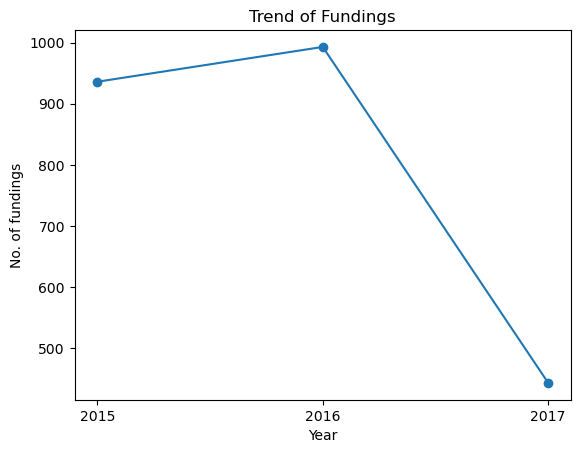

In [460]:

plt.title("Trend of Fundings")
plt.xlabel("Year")
plt.ylabel("No. of fundings")
plt.plot(x,y,marker = 'o')

In [461]:
li = list(zip(x,y))
fundings = pd.DataFrame(li, columns = ["Year", "Number Of Fundings"])
fundings

,Year,Number Of Fundings
0,2015,936
1,2016,993
2,2017,443


In [462]:
test3 = df.copy()

In [463]:
test3['CityLocation']

0       Bangalore
1          Mumbai
2       New Delhi
3          Mumbai
4       Hyderabad
          ...    
2367          NaN
2368          NaN
2369          NaN
2370          NaN
2371          NaN
Name: CityLocation, Length: 2372, dtype: object

In [464]:
test3.dropna(inplace = True, subset = 'CityLocation')

In [465]:
test3['CityLocation']

0       Bangalore
1          Mumbai
2       New Delhi
3          Mumbai
4       Hyderabad
          ...    
2196    Bangalore
2197    Bangalore
2198    Bangalore
2199      Chennai
2200        Noida
Name: CityLocation, Length: 2193, dtype: object

In [466]:
city = []

In [467]:
for i in test3['CityLocation']:
    city.append(i)

In [468]:
city

['Bangalore',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'Hyderabad',
 'Bangalore',
 'Ahmedabad',
 'Gurgaon',
 'Bangalore',
 'Noida',
 'Mumbai',
 'Bangalore',
 'Gurgaon',
 'Bangalore',
 'Bangalore',
 'Hyderabad',
 'Pune',
 'Mumbai',
 'Bangalore',
 'Bangalore',
 'Hyderabad',
 'Bangalore',
 'Pune',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Pune',
 'Noida',
 'Hyderabad',
 'Kolkata',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Gurgaon',
 'Gurgaon',
 'New Delhi',
 'New Delhi',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'New Delhi',
 'New Delhi',
 'Bangalore',
 'Gurgaon',
 'Mumbai',
 'Mumbai',
 'bangalore',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Mumbai',
 'Gurgaon',
 'Kolkata',
 'Mumbai',
 'Bangalore',
 'New Delhi',
 'New Delhi',
 'Gurgaon',
 'New Delhi',
 'Mumbai',
 'Hyderabad',
 'Hyderabad',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Hyderabad',
 'Bangalore',
 'Ahmedabad',
 'Bangalore',
 'New Delhi',
 'Mumbai',
 'Mumbai',
 'New Delhi',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 '

In [469]:
np_city = np.array(city)

In [470]:
np_city = np_city[np_city != '']

In [471]:
for i in range(len(np_city)):
    if 'bangalore' in np_city[i]:
        np_city[i]='Bangalore'
    if np_city[i]=='Delhi':        
        np_city[i]='New Delhi'

In [472]:
dic=dict()
for i in np_city:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1


In [473]:
print(dic)

{'Bangalore': 628, 'Mumbai': 446, 'New Delhi': 385, 'Hyderabad': 76, 'Ahmedabad': 35, 'Gurgaon': 240, 'Noida': 78, 'Pune': 84, 'Kolkata': 19, 'Trivandrum': 2, 'Chennai': 66, 'Chandigarh': 10, 'Jaipur': 25, 'Vadodara': 9, 'Surat': 1, 'Missourie': 1, 'Panaji': 1, 'Gwalior': 2, 'Karur': 1, 'Udupi': 2, 'Kochi': 2, 'Indore': 9, 'Singapore': 5, 'Goa': 7, 'Agra': 2, 'Bangalore/ Bangkok': 2, 'Hubli': 1, 'Kerala': 1, 'Kozhikode': 1, 'US': 1, 'Coimbatore': 3, 'Siliguri': 2, 'USA': 1, 'Lucknow': 1, 'Kanpur': 4, 'SFO / Bangalore': 1, 'London': 1, 'Seattle / Bangalore': 1, 'Pune/Seattle': 1, 'Pune / Dubai': 1, 'Bangalore / SFO': 2, 'Varanasi': 1, 'Bhopal': 2, 'New Delhi / US': 2, 'Mumbai / UK': 1, 'Jodhpur': 1, 'Hyderabad/USA': 1, 'Boston': 1, 'Bangalore / Palo Alto': 1, 'Mumbai / NY': 1, 'USA/India': 1, 'Goa/Hyderabad': 1, 'Noida / Singapore': 1, 'Belgaum': 1, 'Pune / US': 4, 'Chennai/ Singapore': 1, 'Pune / Singapore': 1, 'Bangalore / San Mateo': 1, 'New York/ India': 1, 'US/India': 1, 'Gurgaon /

In [474]:
for i in range(len(np_city)) :
        np_city[i]=np_city[i].split('/')[0].strip()

In [475]:
dic=dict()
for i in np_city:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
print(dic)

{'Bangalore': 635, 'Mumbai': 449, 'New Delhi': 389, 'Hyderabad': 77, 'Ahmedabad': 35, 'Gurgaon': 241, 'Noida': 79, 'Pune': 91, 'Kolkata': 19, 'Trivandrum': 2, 'Chennai': 67, 'Chandigarh': 10, 'Jaipur': 25, 'Vadodara': 9, 'Surat': 1, 'Missourie': 1, 'Panaji': 1, 'Gwalior': 2, 'Karur': 1, 'Udupi': 2, 'Kochi': 2, 'Indore': 9, 'Singapore': 5, 'Goa': 8, 'Agra': 2, 'Hubli': 1, 'Kerala': 1, 'Kozhikode': 1, 'US': 2, 'Coimbatore': 3, 'Siliguri': 2, 'USA': 2, 'Lucknow': 1, 'Kanpur': 4, 'SFO': 1, 'London': 1, 'Seattle': 1, 'Varanasi': 1, 'Bhopal': 2, 'Jodhpur': 1, 'Boston': 1, 'Belgaum': 1, 'New York': 1, 'Nagpur': 1, 'India': 1, 'Udaipur': 1, 'Dallas': 1}


In [476]:
x = []
y = []


In [477]:
for i in dic:
    x.append(i)
    y.append(dic[i])
print(x,y)


['Bangalore', 'Mumbai', 'New Delhi', 'Hyderabad', 'Ahmedabad', 'Gurgaon', 'Noida', 'Pune', 'Kolkata', 'Trivandrum', 'Chennai', 'Chandigarh', 'Jaipur', 'Vadodara', 'Surat', 'Missourie', 'Panaji', 'Gwalior', 'Karur', 'Udupi', 'Kochi', 'Indore', 'Singapore', 'Goa', 'Agra', 'Hubli', 'Kerala', 'Kozhikode', 'US', 'Coimbatore', 'Siliguri', 'USA', 'Lucknow', 'Kanpur', 'SFO', 'London', 'Seattle', 'Varanasi', 'Bhopal', 'Jodhpur', 'Boston', 'Belgaum', 'New York', 'Nagpur', 'India', 'Udaipur', 'Dallas'] [635, 449, 389, 77, 35, 241, 79, 91, 19, 2, 67, 10, 25, 9, 1, 1, 1, 2, 1, 2, 2, 9, 5, 8, 2, 1, 1, 1, 2, 3, 2, 2, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]


In [478]:
np_x = np.array(x)
np_y = np.array(y)

In [479]:
np_x=np_x[np.argsort(np_y)]
np_y=np.sort(np_y)
print(np_x,np_y)

['Dallas' 'Kozhikode' 'Kerala' 'Hubli' 'Udaipur' 'Lucknow' 'Karur'
 'Panaji' 'Surat' 'SFO' 'London' 'Missourie' 'Boston' 'Varanasi' 'India'
 'Nagpur' 'New York' 'Jodhpur' 'Belgaum' 'Seattle' 'US' 'Agra'
 'Trivandrum' 'Kochi' 'Udupi' 'Gwalior' 'Bhopal' 'Siliguri' 'USA'
 'Coimbatore' 'Kanpur' 'Singapore' 'Goa' 'Vadodara' 'Indore' 'Chandigarh'
 'Kolkata' 'Jaipur' 'Ahmedabad' 'Chennai' 'Hyderabad' 'Noida' 'Pune'
 'Gurgaon' 'New Delhi' 'Mumbai' 'Bangalore'] [  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   2   2   2   2   2   2   2   2   2   3   4   5   8   9   9  10
  19  25  35  67  77  79  91 241 389 449 635]


In [480]:
np_x=np_x[len(np_x)-1:len(np_x)-1-10:-1]
np_y=np_y[len(np_y)-1:len(np_y)-1-10:-1]

In [481]:
print(np_x,np_y)

['Bangalore' 'Mumbai' 'New Delhi' 'Gurgaon' 'Pune' 'Noida' 'Hyderabad'
 'Chennai' 'Ahmedabad' 'Jaipur'] [635 449 389 241  91  79  77  67  35  25]


([<matplotlib.patches.Wedge at 0x159c9eb92d0>,
 [Text(1.2699896737757506, 1.7964203930324782, 'Bangalore'),
  Text(-1.8695546422498692, 1.1596402199139024, 'Mumbai'),
  Text(-1.674611652165565, -1.426771114941467, 'New Delhi'),
  Text(0.1818482494192129, -2.1924714853751617, 'Gurgaon'),
  Text(1.2098415304265486, -1.8374665905140009, 'Pune'),
  Text(1.6353615815366997, -1.4715952220749373, 'Noida'),
  Text(1.9327655553732912, -1.0509126071955623, 'Hyderabad'),
  Text(2.1134937160450855, -0.6108553938846224, 'Chennai'),
  Text(2.1820329397050937, -0.28059267638687213, 'Ahmedabad'),
  Text(2.1984438214408457, -0.08273308871650124, 'Jaipur')],
 [Text(0.6927216402413184, 0.9798656689268062, '30.41%'),
  Text(-1.0197570775908378, 0.6325310290439466, '21.50%'),
  Text(-0.9134245375448535, -0.7782387899680728, '18.63%'),
  Text(0.09918995422866157, -1.195893537477361, '11.54%'),
  Text(0.6599135620508446, -1.0022545039167277, '4.36%'),
  Text(0.892015408110927, -0.8026883029499657, '3.78%'),


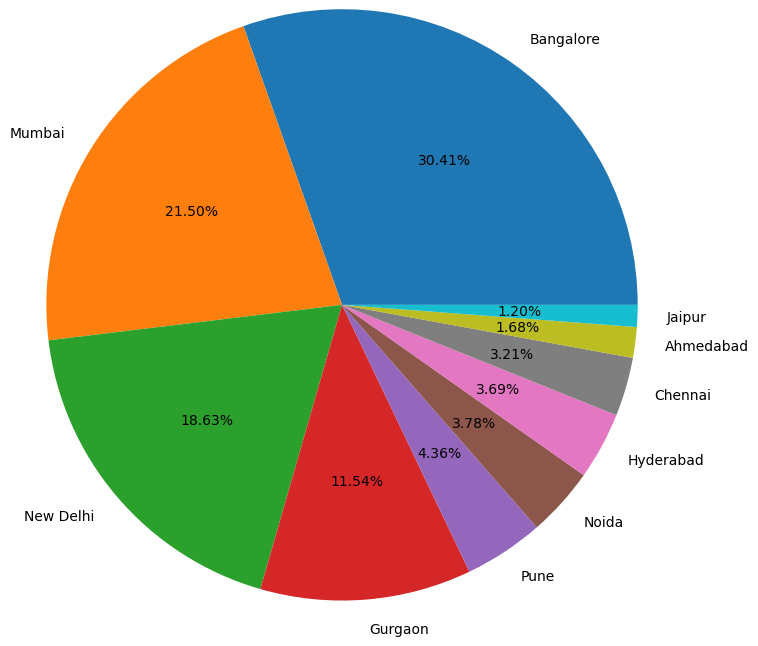

In [482]:
plt.pie(np_y,labels = np_x,autopct="%.2f%%",radius = 2)

In [483]:
li = list(zip(np_x,np_y))
fundings = pd.DataFrame(li, columns = ["City", "No. Of Startups"])
fundings

,City,No. Of Startups
0,Bangalore,635
1,Mumbai,449
2,New Delhi,389
3,Gurgaon,241
4,Pune,91
5,Noida,79
6,Hyderabad,77
7,Chennai,67
8,Ahmedabad,35
9,Jaipur,25


In [484]:
test4 = df.copy()

In [485]:
test4.loc[df.CityLocation=='bangalore','CityLocation']='Bangalore'
test4.loc[df.CityLocation=='Delhi','CityLocation']='New Delhi'

In [486]:
test4.loc[df.AmountInUSD.isnull(),'AmountInUSD'] = '0'

In [487]:
city = []
amount = []

In [488]:
for i in test4['CityLocation']:
    city.append(i)
for i in test4['AmountInUSD']:
    amount.append(i)

In [489]:
for i in range(len(amount)):
    amount[i]=''.join(amount[i].split(','))

In [490]:
dic = dict()


In [491]:
np_city = np.array(city)
np_amount = np.array(amount,dtype = 'int64')
#print(len(np_city))
#print(len(np_amount))

In [492]:
for i in range(len(np_city)) :
        np_city[i]=np_city[i].split('/')[0].strip()

In [493]:
print(len(np_city))
print(len(np_amount))

2372
2372


In [494]:
for i in range(0,len(np_city)):
    if np_city[i] in dic:
        dic[np_city[i]] += np_amount[i]
    else:
        dic[np_city[i]] = np_amount[i]
    

In [495]:
dic

{'Bangalore': 8422974108,
 'Mumbai': 2354934500,
 'New Delhi': 2818247500,
 'Hyderabad': 195362000,
 'Ahmedabad': 98186000,
 'Gurgaon': 2069021500,
 'Noida': 170638000,
 'Pune': 366653000,
 'Kolkata': 13865000,
 'Trivandrum': 100000,
 'Chennai': 411105000,
 'Chandigarh': 26100000,
 'Jaipur': 35560000,
 'Vadodara': 6040000,
 'Surat': 0,
 'Missourie': 350000,
 'Panaji': 825000,
 'Gwalior': 900000,
 'Karur': 0,
 'Udupi': 12000000,
 'Kochi': 0,
 'Indore': 1672000,
 'Singapore': 3850000,
 'Goa': 2380000,
 'Agra': 0,
 'Hubli': 0,
 'Kerala': 27000,
 'Kozhikode': 0,
 'US': 3000000,
 'Coimbatore': 1650000,
 'Siliguri': 0,
 'nan': 1271863868,
 'USA': 16600000,
 'Lucknow': 1000000,
 'Kanpur': 220000,
 'SFO': 2700000,
 'London': 0,
 'Seattle': 0,
 'Varanasi': 52000,
 'Bhopal': 1900000,
 'Jodhpur': 160000,
 'Boston': 3000000,
 'Belgaum': 500000,
 'New York': 2950000,
 'Nagpur': 0,
 'India': 30000000,
 'Udaipur': 0,
 'Dallas': 1000000}

In [496]:
xaxis = []
yaxis = []

In [497]:
for i in dic:
    xaxis.append(i)
    yaxis.append(dic[i])

In [498]:
npx = np.array(xaxis)
npy = np.array(yaxis)

In [499]:
npx = npx[np.argsort(npy)]
npy = np.sort(npy)

In [500]:
npx = npx[len(npx)-1:len(npx)-1-10:-1]
npy = npy[len(npy)-1:len(npy)-1-10:-1]
print(npx)
print(npy)

['Bangalore' 'New Delhi' 'Mumbai' 'Gurgaon' 'nan' 'Chennai' 'Pune'
 'Hyderabad' 'Noida' 'Ahmedabad']
[8422974108 2818247500 2354934500 2069021500 1271863868  411105000
  366653000  195362000  170638000   98186000]


(array([0.e+00, 1.e+09, 2.e+09, 3.e+09, 4.e+09, 5.e+09, 6.e+09, 7.e+09,
        8.e+09, 9.e+09]),
 [Text(0, 0.0, '0'),
  Text(0, 1000000000.0, '1'),
  Text(0, 2000000000.0, '2'),
  Text(0, 3000000000.0, '3'),
  Text(0, 4000000000.0, '4'),
  Text(0, 5000000000.0, '5'),
  Text(0, 6000000000.0, '6'),
  Text(0, 7000000000.0, '7'),
  Text(0, 8000000000.0, '8'),
  Text(0, 9000000000.0, '9')])

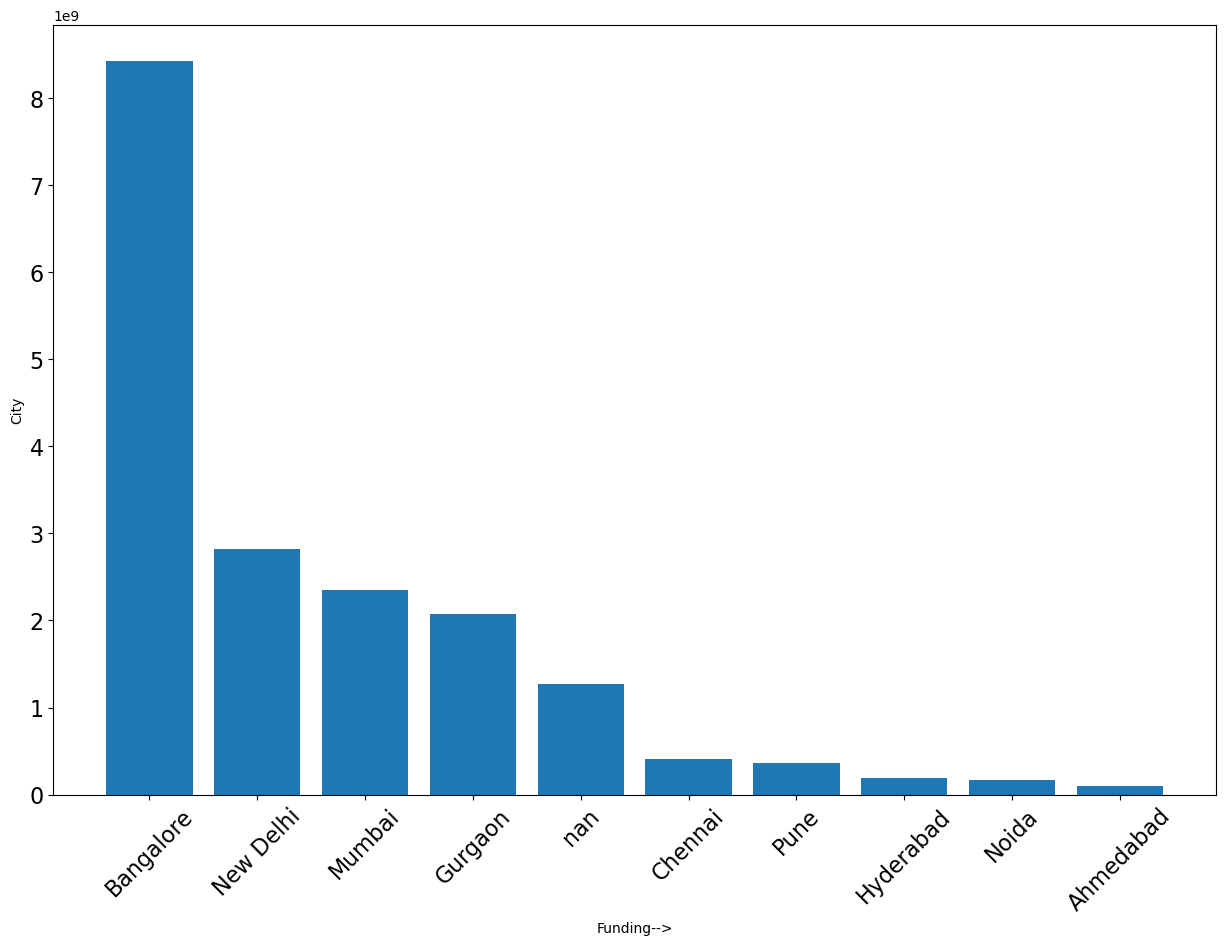

In [501]:
plt.subplots(figsize=(15, 10))
plt.bar(npx,npy)

plt.xlabel("Funding-->")
plt.ylabel("City")
plt.xticks(rotation=45, size=16)
plt.yticks(size=16)

In [502]:
for i in range(len(npx)):
    print(npx[i],'-->', format((npy[i]*100)/sum(npy), '.2f'), 'Percent')

Bangalore --> 46.33 Percent
New Delhi --> 15.50 Percent
Mumbai --> 12.95 Percent
Gurgaon --> 11.38 Percent
nan --> 7.00 Percent
Chennai --> 2.26 Percent
Pune --> 2.02 Percent
Hyderabad --> 1.07 Percent
Noida --> 0.94 Percent
Ahmedabad --> 0.54 Percent


In [503]:
t5 = df.copy()

In [504]:
t5.dropna(inplace = True, subset = ['InvestmentType'])
t5.loc[t5.CityLocation=='bangalore','CityLocation']='Bangalore'
t5.loc[t5.CityLocation=='Delhi','CityLocation']='New Delhi'

t5.loc[t5.InvestmentType=='PrivateEquity', 'InvestmentType'] = 'Private Equity'
t5.loc[t5.InvestmentType=='Crowd funding', 'InvestmentType'] = 'Crowd Funding'
t5.loc[t5.InvestmentType=='SeedFunding', 'InvestmentType'] = 'Seed Funding'

In [505]:
it = []

In [506]:
for i in t5['InvestmentType']:
    it.append(i)

In [507]:
dic = dict()

In [508]:
for i in it:
    if i in dic.keys():
        dic[i] += 1
    else:
        dic[i] = 1
dic

{'Private Equity': 1067,
 'Seed Funding': 1301,
 'Debt Funding': 1,
 'Crowd Funding': 2}

In [509]:
x = []
y = []


In [510]:
for i in dic:
    x.append(i)
    y.append(dic[i])
    

In [511]:
print(x,y)

['Private Equity', 'Seed Funding', 'Debt Funding', 'Crowd Funding'] [1067, 1301, 1, 2]


In [512]:
npx = np.array(x)
npy = np.array(y)

In [513]:
npx = npx[np.argsort(npy)]
npy = np.sort(npy)

In [514]:
print(npx,npy)

['Debt Funding' 'Crowd Funding' 'Private Equity' 'Seed Funding'] [   1    2 1067 1301]


In [515]:
npy = npy[::-1]
npx = npx[::-1]
print(npx,npy)

['Seed Funding' 'Private Equity' 'Crowd Funding' 'Debt Funding'] [1301 1067    2    1]


([<matplotlib.patches.Wedge at 0x159cbfc7f90>,
 [Text(-0.16768585382691156, 1.0871437137868847, 'Seed Funding'),
  Text(0.1633631250323682, -1.0878016774116774, 'Private Equity'),
  Text(1.9999719098499842, -0.010599991085218158, 'Crowd Funding'),
  Text(1.9999982443803068, -0.0026499954132951893, 'Debt Funding')],
 [Text(-0.09146501117831539, 0.5929874802473916, '54.87%'),
  Text(0.08910715910856447, -0.5933463694972785, '45.00%'),
  Text(1.4999789323874881, -0.007949993313913618, '0.08%'),
  Text(1.4999986832852301, -0.0019874965599713922, '0.04%')])

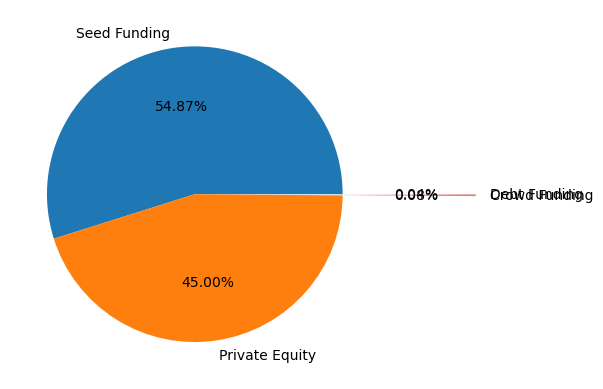

In [516]:
plt.pie(npy,labels = npx,autopct="%.2f%%",explode = [0,0,0.9,0.9])